In [1]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Function to plot data
def plot_data(file_path, ax, x_label):
    # Extract data from DataFrame
    df = pd.read_csv(file_path)
    S0_EXP_T = df['S0_EXP_T']
    S0_EXP_liquid = df['S0_EXP_liq']
    S0_EXP_vapor = df['S0_EXP_vap']
    S0_MD_T = df['S0_MD_T']
    S0_MD_liquid = df['S0_MD_liq']
    S0_MD_vapor = df['S0_MD_vap']
    EXP_T = df['EXP_T']
    EXP_liquid = df['EXP_liq']
    EXP_vapor = df['EXP_vap']
    S0_EXP_azeotrope = df['S0_EXP_azeotrope']
    S0_MD_azeotrope = df['S0_MD_azeotrope']
    Exp_azeotrope = df['EXP_azeotrope']

    # Plot data
    PEXP_liquid , = ax.plot(EXP_liquid, EXP_T, marker='none', linewidth=2.0, c='grey', ls = "-", label="EXP liquid")
    PEXP_vapor , = ax.plot(EXP_vapor, EXP_T, marker='none', linewidth=2.0,  c='grey', ls = "--", label="EXP vapor")
    PMD_S0_liquid , = ax.plot(S0_MD_liquid, S0_MD_T, marker='none', linewidth=2.0, c='skyblue', ls = "-", label="S0+MD liquid")
    PMD_S0_vapor , = ax.plot(S0_MD_vapor, S0_MD_T, marker='none', linewidth=2.0, c='skyblue', ls = "--", label="S0+MD vapor")
    PS0_EXP_liquid , = ax.plot(S0_EXP_liquid, S0_EXP_T, marker='none', linewidth=2.0, c='tomato', ls = "-", label="S0+EXP liquid")
    PS0_EXP_vapor , = ax.plot(S0_EXP_vapor, S0_EXP_T, marker='none', linewidth=2.0, c='tomato', ls = "--", label="S0+EXP vapor")
    Pazeotrope_exp ,  =  ax.plot(Exp_azeotrope[1], Exp_azeotrope[0], marker='s', ms ="10", c='grey', label=" azeotrope")
    Pazeotrope_original , = ax.plot(S0_MD_azeotrope[1], S0_MD_azeotrope[0], marker='p', ms ="12", c='royalblue', label="azeotrope")
    Pazeotrope_updated ,  =  ax.plot(S0_EXP_azeotrope[1], S0_EXP_azeotrope[0], marker='*', ms ="15", c='red', label=" azeotrope")

    # Set x-axis range and interval
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(r"$ T $ [K]", fontsize=14)

    ax.set_xticks(np.arange(0, 1.1, step=0.1))
    ax.margins(x=0)

    y_min, y_max = ax.get_ylim()  # Get current y-axis range
    ax.set_yticks(np.arange(int(y_min), int(y_max) + 1, (int(y_max) - int(y_min)) // 5))  # Divide y-axis into 5 equal parts

    return PMD_S0_liquid, PMD_S0_vapor, PS0_EXP_liquid, PS0_EXP_vapor, PEXP_liquid, PEXP_vapor, Pazeotrope_exp, Pazeotrope_original, Pazeotrope_updated  

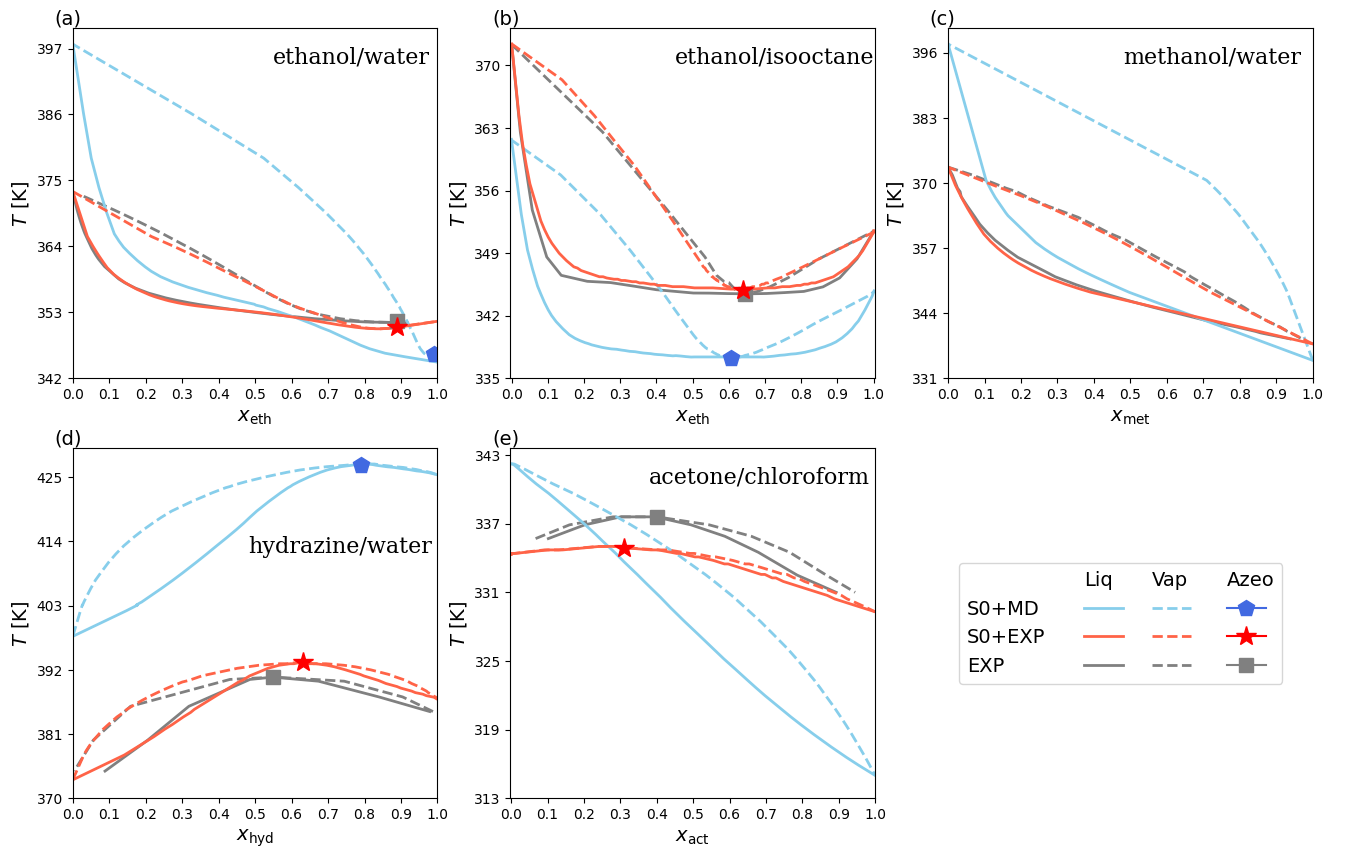

In [2]:
# read data
file_path_1 = "/Users/xiaoyuwang/Downloads/GitHub/Phase Diagram/ethanol_water_data.csv"
file_path_2 = "/Users/xiaoyuwang/Downloads/GitHub/Phase Diagram/ethanol_isooctane_data.csv"
file_path_3 = "/Users/xiaoyuwang/Downloads/GitHub/Phase Diagram/hydrazine_water_data.csv"
file_path_4 = "/Users/xiaoyuwang/Downloads/GitHub/Phase Diagram/acetone_chloroform_data.csv"
file_path_5 = "/Users/xiaoyuwang/Downloads/GitHub/Phase Diagram/methanol_water_data.csv"

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

# Make the subplot at the second row and third column invisible as we only have 5 plots
axs[1, 2].set_visible(False)

# Plot data for each file
# The plot_data function is assumed to be defined elsewhere
# It takes a file path, an Axes object, and a label for the x-axis
# It returns various data that might be used for further analysis
PMD_S0_liq, PMD_S0_vap, PS0_EXP_liq, PS0_EXP_vap, PEXP_liq, PEXP_vap, Pazeotrope_exp, Pazeotrope_original, Pazeotrope_updated  = plot_data(file_path_1, axs[0, 0],r"$x_\mathrm{{eth}}$")
PMD_S0_liq, PMD_S0_vap, PS0_EXP_liq, PS0_EXP_vap, PEXP_liq, PEXP_vap, Pazeotrope_exp, Pazeotrope_original, Pazeotrope_updated  = plot_data(file_path_2, axs[0, 1],r"$x_\mathrm{{eth}}$")
PMD_S0_liq, PMD_S0_vap, PS0_EXP_liq, PS0_EXP_vap, PEXP_liq, PEXP_vap, Pazeotrope_exp, Pazeotrope_original, Pazeotrope_updated  = plot_data(file_path_5, axs[0, 2],r"$x_\mathrm{{met}}$")
PMD_S0_liq, PMD_S0_vap, PS0_EXP_liq, PS0_EXP_vap, PEXP_liq, PEXP_vap, Pazeotrope_exp, Pazeotrope_original, Pazeotrope_updated  = plot_data(file_path_3, axs[1, 0],r"$x_\mathrm{{hyd}}$")
PMD_S0_liq, PMD_S0_vap, PS0_EXP_liq, PS0_EXP_vap, PEXP_liq, PEXP_vap, Pazeotrope_exp, Pazeotrope_original, Pazeotrope_updated  = plot_data(file_path_4, axs[1, 1],r"$x_\mathrm{{act}}$")

# Create a new Axes object to hold the legend
legend_ax = fig.add_axes([0.63, 0.15, 0.3, 0.27])
legend_ax.axis('off')  # Turn off the axis

# Add a legend to the new Axes object
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
legend_handle = [extra, extra, extra, extra, extra,  PMD_S0_liq, PS0_EXP_liq, PEXP_liq,  extra, PMD_S0_vap,  PS0_EXP_vap, PEXP_vap, extra, Pazeotrope_original, Pazeotrope_updated, Pazeotrope_exp]
legend_labels = np.concatenate([["", "S0+MD", "S0+EXP", "EXP"], ["Liq"], [""] * 3, ["Vap"], [""] * 3, ["Azeo"], [""] * 3])
legend = legend_ax.legend(legend_handle, legend_labels, loc='center', ncol=4, shadow=None, handletextpad=-2, fontsize=14)

# Add labels below each subplot
for i, label in enumerate(['a', 'b', 'c', 'd', 'e']):
    axs[i // 3, i % 3].text(-0.05, 1.01, f'({label})', transform=axs[i // 3, i % 3].transAxes, size=14)

# Add text to the top right of each subplot
axs[0, 0].text(0.55, 0.9, 'ethanol/water', transform=axs[0, 0].transAxes, fontdict={'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 16})
axs[0, 1].text(0.45, 0.9, 'ethanol/isooctane', transform=axs[0, 1].transAxes, fontdict={'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 16})
axs[0, 2].text(0.48, 0.9, 'methanol/water', transform=axs[0, 2].transAxes, fontdict={'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 16})
axs[1, 0].text(0.48, 0.7, 'hydrazine/water', transform=axs[1, 0].transAxes, fontdict={'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 16})
axs[1, 1].text(0.38, 0.9, 'acetone/chloroform', transform=axs[1, 1].transAxes, fontdict={'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 16})

plt.show()